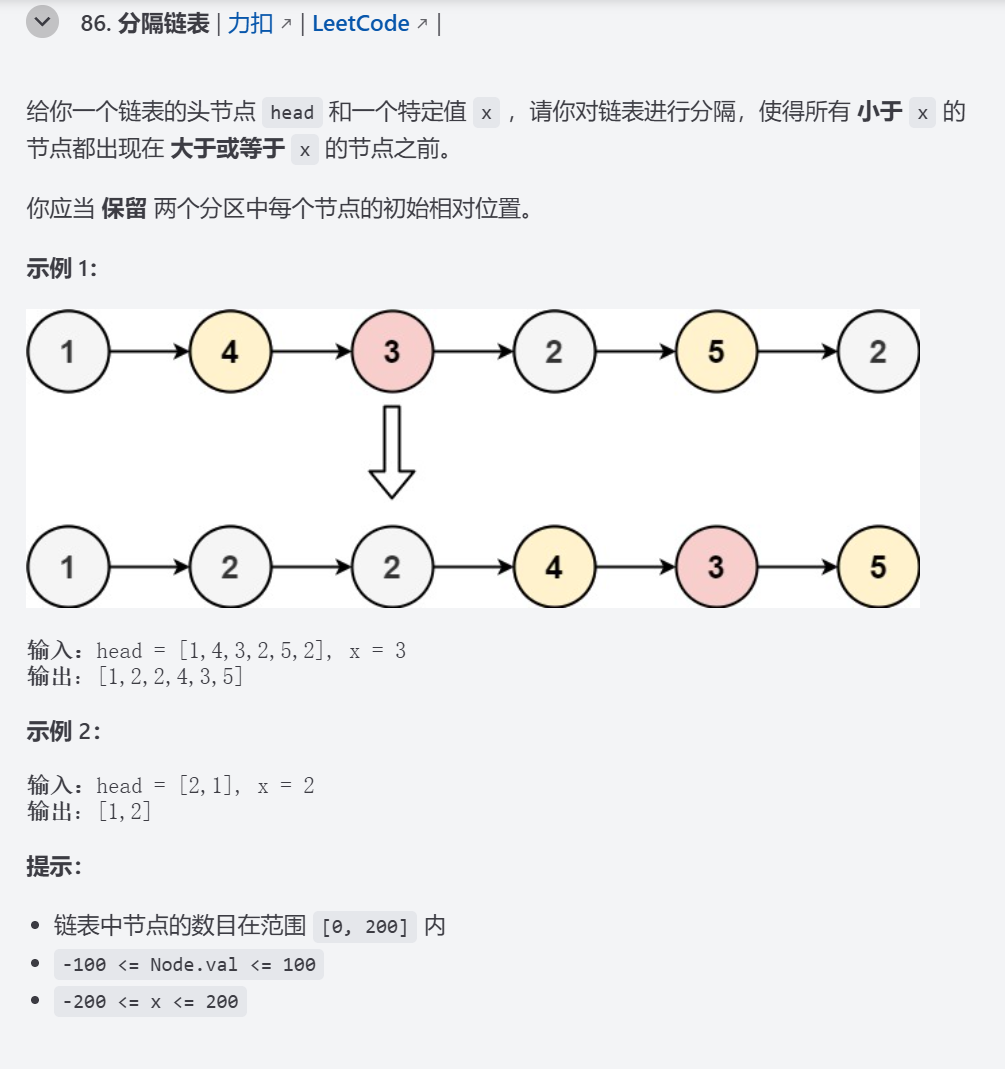

https://leetcode.com/problems/partition-list/

Difficulty: Medium

In [ ]:
# Definition for singly-linked list.
from typing import Optional

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def partition(self, head: Optional[ListNode], x: int) -> Optional[ListNode]:

        #1 5 3 2 3 6 7 8    5 -> 1 3 2 3 5 6 7 8
        #1 6 5 3 5 2 8 4    5 -> 1 5 6 3 5 2 8 4 
        # 5 -> 1 3 5 6 5 2 8 4 
        if head is None:
            return None

        left_head = ListNode(-1)
        left_p = left_head
        right_head = ListNode(-1)
        right_p = right_head
        p = head

        while p is not None:
            if p.val < x:
                left_p.next = p
                left_p = left_p.next
            else:
                right_p.next = p
                right_p = right_p.next
            
            #这段代码很重要，你如果不断开的话会有链接的环，所以必须要断开，因此建议如果loop linkedlist都要采用断开后update的方式
            temp = p.next
            p.next = None
            p = temp
            #
        left_p.next = right_head.next
        return left_head.next


In [ ]:
import heapq

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    
    def __lt__(self, other):
        return self.val < other.val

class Solution:
    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        
        if not lists:
            return None

        #Construct the priority queue
        pq = []
        dummyhead = ListNode(-1)
        p = dummyhead

        for i in range(len(lists)):
            head = lists[i]
            if head is not None:
                heapq.heappush(pq, (head.val,i,head))
        
        while pq:
            val, i, node = heapq.heappop(pq)
            p.next = ListNode(val)
            if node.next is not None:
                heapq.heappush(pq, (head.next.val,i, node.next))
            
